In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### 2.Loading the dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

### 3. Exploratory Data Analysis

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
#learning about the columns
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#knowledge of data type helps for computation
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#Print a concise summary of a DataFrame
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### CONCLUSION :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

### Data cleaning
- Dropping duplicate values
- Checking NULL values
- Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [9]:
#dropping duplicate values
diabetes_dataset = diabetes_dataset.drop_duplicates()

In [10]:
#check for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
#checking for 0 values in 5 columns
print(diabetes_dataset[diabetes_dataset['BloodPressure']==0].shape[0])
print(diabetes_dataset[diabetes_dataset['Glucose']==0].shape[0])
print(diabetes_dataset[diabetes_dataset['SkinThickness']==0].shape[0])
print(diabetes_dataset[diabetes_dataset['Insulin']==0].shape[0])
print(diabetes_dataset[diabetes_dataset['BMI']==0].shape[0])

35
5
227
374
11


In [12]:
#Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace 

#### Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

In [13]:
#replacing 0 values with median of that column
diabetes_dataset['Glucose']=diabetes_dataset['Glucose'].replace(0,diabetes_dataset['Glucose'].mean())
#normal distribution
diabetes_dataset['BloodPressure']=diabetes_dataset['BloodPressure'].replace(0,diabetes_dataset['BloodPressure'].mean())
#normal distribution
diabetes_dataset['SkinThickness']=diabetes_dataset['SkinThickness'].replace(0,diabetes_dataset['SkinThickness'].median())
#skewed distribution
diabetes_dataset['Insulin']=diabetes_dataset['Insulin'].replace(0,diabetes_dataset['Insulin'].median())
#skewed distribution
diabetes_dataset['BMI']=diabetes_dataset['BMI'].replace(0,diabetes_dataset['BMI'].median())
#skewed distribution

### 4.Data Visualization

#### Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers

In [14]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

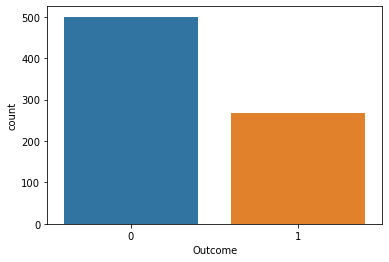

In [15]:
sns.countplot('Outcome',data=diabetes_dataset)

#### 0 --> Non-Diabetic

#### 1 --> Diabetic

#### Conclusion :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

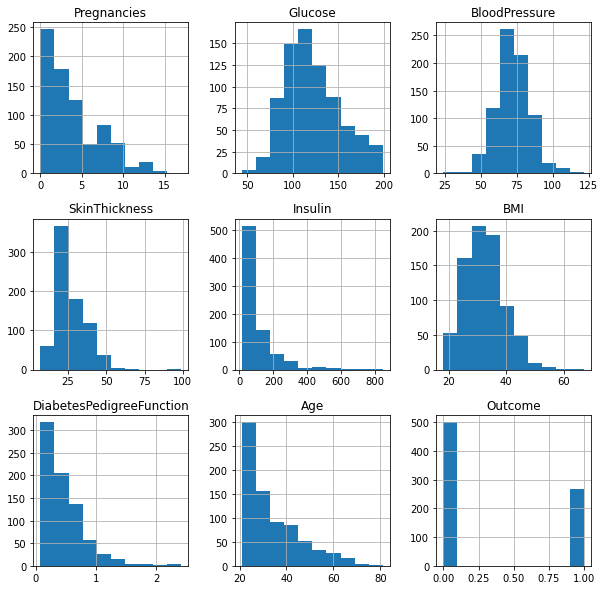

In [16]:
#histogram for each  feature
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

#### Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

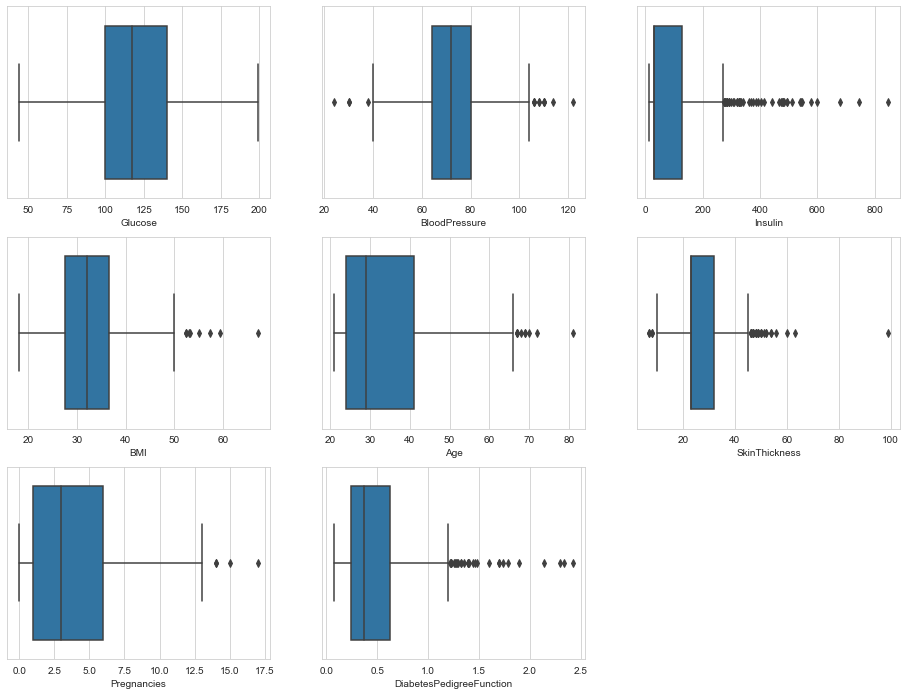

In [17]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes_dataset)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes_dataset)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes_dataset)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes_dataset)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes_dataset)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes_dataset)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes_dataset)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes_dataset)

#### Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of most importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

### 5.Feature Selection

<AxesSubplot:>

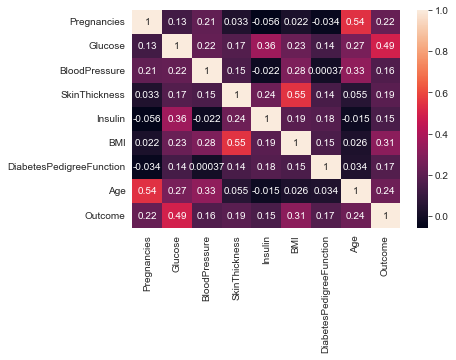

In [18]:
corrmat=diabetes_dataset.corr()
sns.heatmap(corrmat, annot=True)

 #### CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [19]:
diabetes_selected=diabetes_dataset.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

### 6.handing Outliers

In [20]:
from sklearn.preprocessing import QuantileTransformer
x=diabetes_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
diabetes_new=quantile.transform(X)
diabetes_new=pd.DataFrame(X)
diabetes_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
diabetes_new.head(10)

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0
5,0.677966,0.483703,0.357888,0.171447,0.529335,0.0
6,0.503259,0.039765,0.735332,0.433507,0.368970,1.0
7,0.940678,0.473272,0.357888,0.691656,0.496741,0.0
8,0.387223,0.996089,0.956323,0.408083,0.919166,1.0
9,0.863755,0.604302,0.357888,0.487614,0.926336,1.0


<AxesSubplot:xlabel='SkinThickness'>

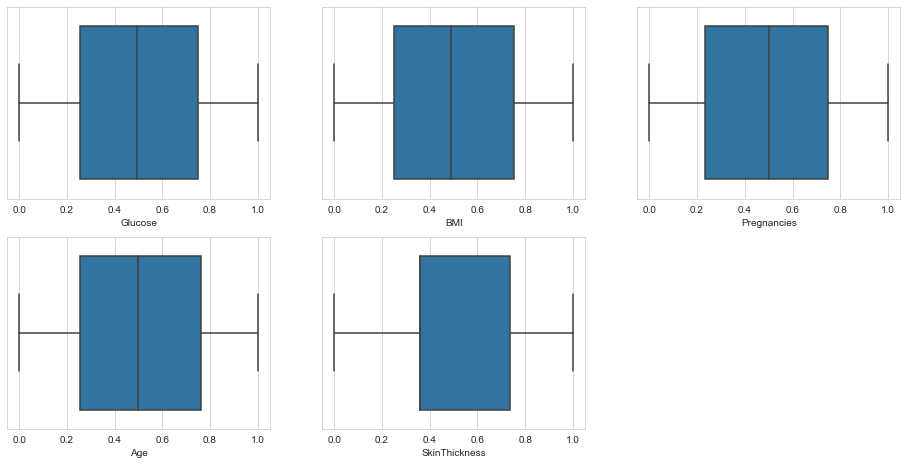

In [21]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=diabetes_new['Glucose'],data=diabetes_new)
plt.subplot(3,3,2)
sns.boxplot(x=diabetes_new['BMI'],data=diabetes_new)
plt.subplot(3,3,3)
sns.boxplot(x=diabetes_new['Pregnancies'],data=diabetes_new)
plt.subplot(3,3,4)
sns.boxplot(x=diabetes_new['Age'],data=diabetes_new)
plt.subplot(3,3,5)
sns.boxplot(x=diabetes_new['SkinThickness'],data=diabetes_new)

### 7.Split the Data Frame into X and Y

In [22]:
target_name='Outcome'
y= diabetes_new[target_name]#given predictions - training data 
X=diabetes_new.drop(target_name,axis=1)

In [23]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [24]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X)

StandardScaler()

In [27]:
standardized_data = scaler.transform(X)

In [28]:
print(standardized_data)

[[ 0.85092804  1.07329753  1.06190582  0.3154449   1.33615773]
 [-0.84797109 -1.41442285  0.50865557 -0.99266179  0.21042556]
 [ 1.23371797  1.58076543 -0.50142788 -1.46177591  0.3012819 ]
 ...
 [ 0.62082398  0.17113239 -0.50142788 -1.04227963  0.11070519]
 [-0.84797109  0.41471698 -0.50142788 -0.39499235  1.25859744]
 [-0.84797109 -1.13926248  0.7129679  -0.34988523 -1.00837895]]


In [29]:
X = standardized_data
y = diabetes_dataset['Outcome']

In [30]:
print(X)

[[ 0.85092804  1.07329753  1.06190582  0.3154449   1.33615773]
 [-0.84797109 -1.41442285  0.50865557 -0.99266179  0.21042556]
 [ 1.23371797  1.58076543 -0.50142788 -1.46177591  0.3012819 ]
 ...
 [ 0.62082398  0.17113239 -0.50142788 -1.04227963  0.11070519]
 [-0.84797109  0.41471698 -0.50142788 -0.39499235  1.25859744]
 [-0.84797109 -1.13926248  0.7129679  -0.34988523 -1.00837895]]


In [31]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### 8.Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)
#splitting data in 80% train, 20%test

In [33]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [34]:
X_test.shape,y_test.shape

((154, 5), (154,))

### 9.Classification Algorithms
- **9.1 K Nearest Neighbours** :- KNN algorithm, is a non-parametric algorithm that classifies data points based on their proximity and association to other available data.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [36]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [37]:
best_model = grid_search.fit(X_train,y_train)

In [38]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 16


In [39]:
#Predict testing set
knn_pred = best_model.predict(X_test)

In [40]:
print("\n Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("\n Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))


 Confusion Matrix:
 [[93 14]
 [16 31]]

 Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6739130434782609

 Precision score is:
 0.6888888888888889

 Recall score is:
 0.6595744680851063


- **9.2 Naive Bayes** :- Naive Bayes is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [42]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [43]:
nb_pred=best_model.predict(X_test)

In [44]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test,nb_pred))
print("\n Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))



 Confusion Matrix:
 [[93 14]
 [22 25]]

 Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       107
           1       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213


- **9.3 Support Vector Machine** :- It is typically leveraged for classification problems, constructing a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., has diabetes vs doesn't have diabetes ) on either side of the plane.

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score


In [46]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [47]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [48]:
grid_result = grid_search.fit(X, y)

In [49]:
svm_pred=grid_result.predict(X_test)

In [50]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test,svm_pred))
print("\n Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))


 Confusion Matrix:
 [[95 12]
 [15 32]]

 Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6739130434782609

 Precision score is:
 0.6888888888888889

 Recall score is:
 0.6595744680851063


- **9.4 Logistic Regression** :- Logistical regression is selected when the dependent variable is categorical, meaning they have binary outputs, such as "true" and "false" or "yes" and "no." 
- Logistic regression does not really have any critical hyperparameters to tune. Sometimes, you can see useful differences in performance or convergence with different solvers (solver).Regularization (penalty) can sometimes be helpful.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


In [52]:
reg = LogisticRegression()
reg.fit(X_train,y_train)    

LogisticRegression()

In [53]:
lr_pred=reg.predict(X_test)

In [54]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test,lr_pred))
print("\n Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))


 Confusion Matrix:
 [[93 14]
 [20 27]]

 Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154


 F1:
 0.6136363636363638

 Precision score is:
 0.6585365853658537

 Recall score is:
 0.574468085106383


### Accuracy Score
#### K Nearest Neighbours :- 81%
#### Naive Bayes :- 77%
#### Support Vector Machine :- 82%
#### Logistic Regression :- 78%

In [60]:
input_data = (1,189,23,0.398,59)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(input_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 1.68317356e+00  6.52172648e+02  7.92331822e+01 -3.53196090e-01
   1.98873345e+02]]


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.